## Student Performance Prediction 


### 1.Problem Statement
 - This problem understands how the student performance is affected by the different parameters like gender,age,Lunch, Parental level of education and the race ethnicity of the student.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

#### 2.1 Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the Data set

In [4]:
df.shape

(1000, 8)

#### Data set information

 - gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Checking missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no missing values in the data set 

#### 3.2 Check duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

#### There are also no duplicate values in the data set.

#### 3.3 Checking the data type of the attributes

In [7]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values in the colums 

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Statistics of the data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- From all the numeric data all means are close to the 66 and 69 
- All standard deviations are also -between 14.6 and 15.19
- While there is a minimum score for math_score of 0, while for writing _score is 10 and for reading it is higher i.e . 17

#### 3.7 Exploring data 

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Printing the unique categorical values for the attributes

In [12]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:   ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parent level of education ' variable:   ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:    ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parent level of education ' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']


In [13]:
# defining numerical and categorical columns 
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

print("We have {} numerical features: {} ".format(len(numerical_features),numerical_features))
print("\n We have {} categorical features: {}".format(len(categorical_features),categorical_features))


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score'] 

 We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


#### 3.8 Adding columns for total score and average

In [15]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
df[df['reading_score']==100]['average_score']

106     95.666667
114     99.666667
149     97.666667
165     98.666667
179     99.000000
381     94.000000
458    100.000000
546     96.333333
566     97.333333
594     97.000000
712     99.000000
886     96.000000
903     97.666667
916    100.000000
957     97.333333
962    100.000000
970     96.333333
Name: average_score, dtype: float64

In [18]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f"Number of students with full marks in Maths:{math_full}")
print(f"Number of students with full marks in Reading:{reading_full}")
print(f"Number of students with full marks in Writing:{writing_full}")



Number of students with full marks in Maths:7
Number of students with full marks in Reading:17
Number of students with full marks in Writing:14


In [19]:
reading_less_20 = df[df['reading_score']<=20]['average_score'].count()
writing_less_20 = df[df['writing_score']<=20]['average_score'].count()
math_less_20 = df[df['math_score']<=20]['average_score'].count()

print(f"Number of students with less than 20 marks in Maths:{math_less_20}")
print(f"Number of students with less than 20 marks in Reading : {reading_less_20}")
print(f"Number of studenst with less than 20 marks in Writing:{writing_less_20}")

Number of students with less than 20 marks in Maths:4
Number of students with less than 20 marks in Reading : 1
Number of studenst with less than 20 marks in Writing:3


#### Insights 
- From the above values we observe that students perfrom worst in Maths
- Students perform well in Reading

#### 4. Exploring Data(Data Visualisation)

- Histogram
- Kernel Density Distribution Function(KDE)

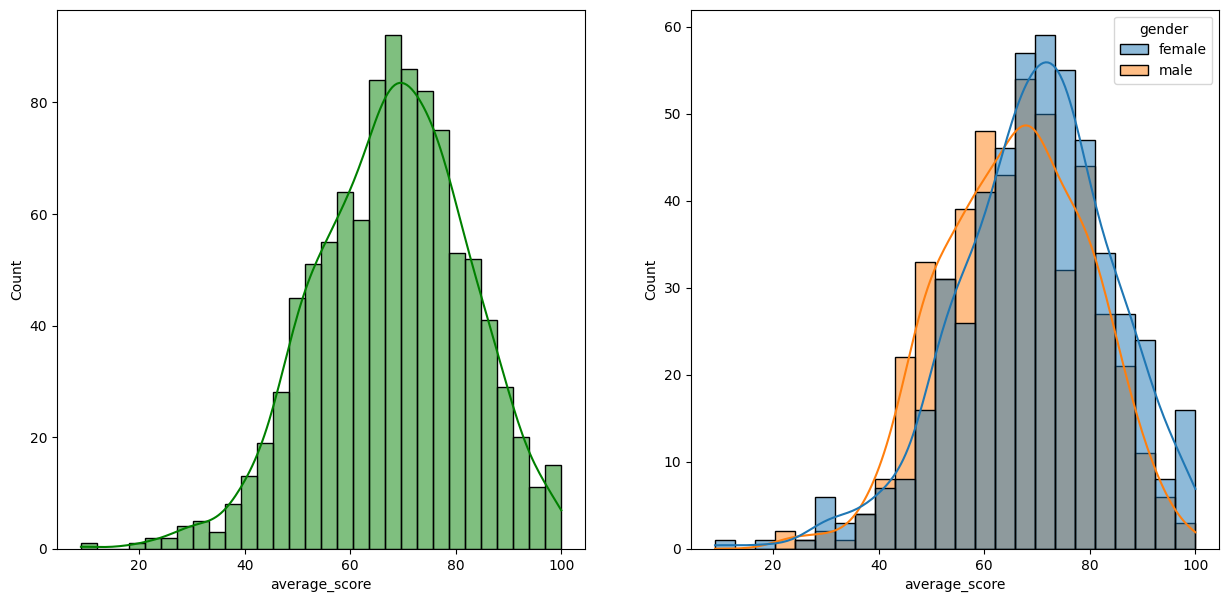

In [20]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins= 30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

<p> The left plot answers:

“What is the general trend of student performance?”

The right plot answers:

“Do different genders perform differently on average?”</p>

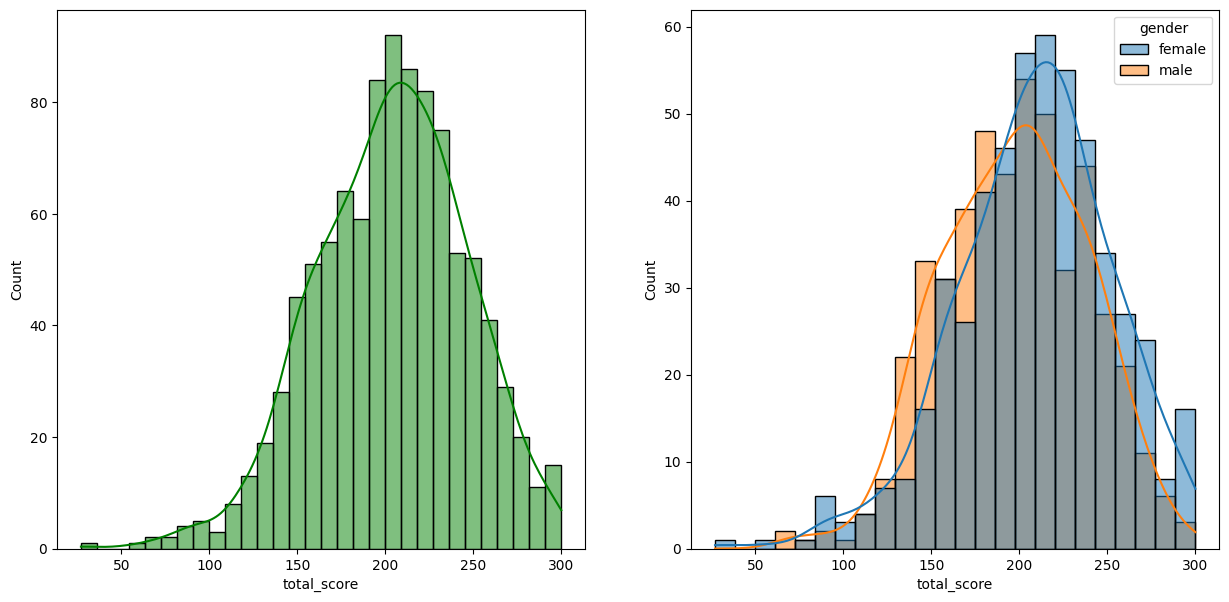

In [21]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

- Female students tend to perform better than Male students

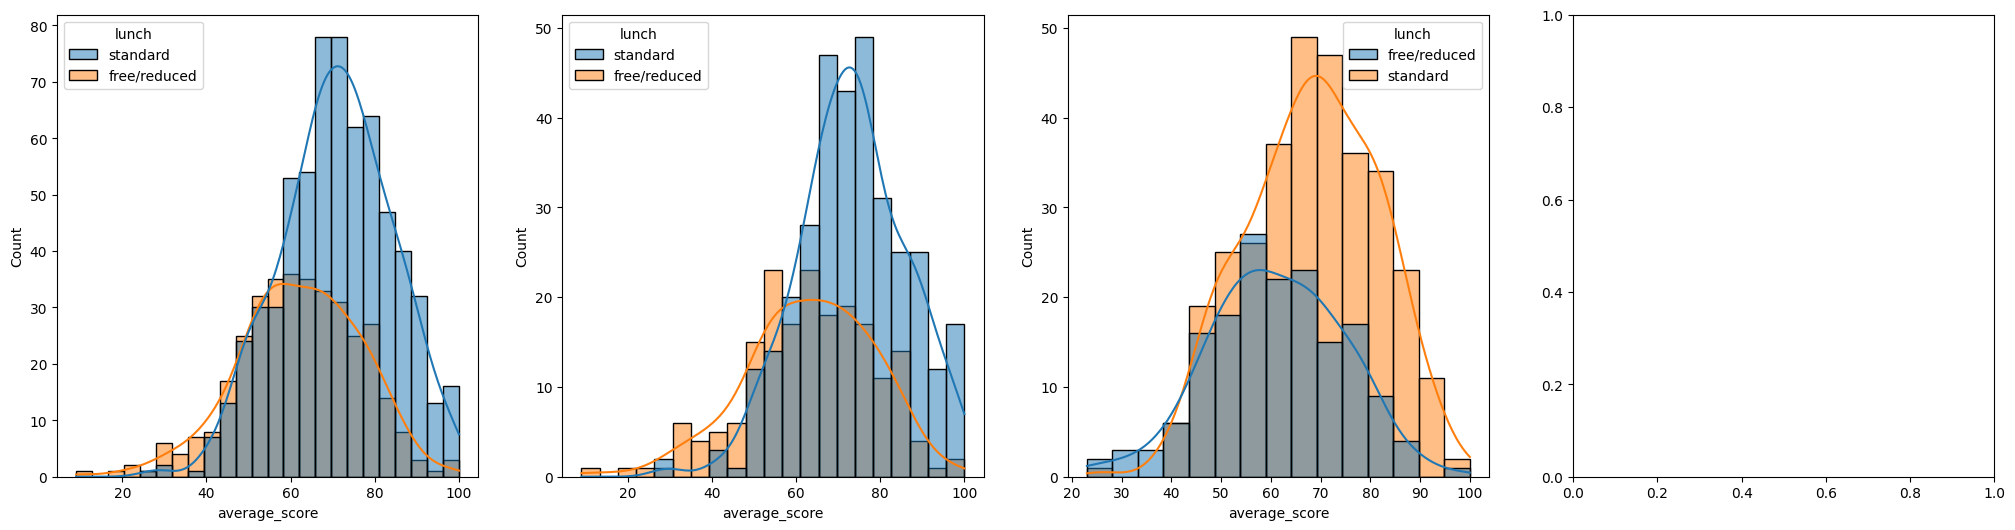

In [22]:
fig, axs =plt.subplots(1,4,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

In [23]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


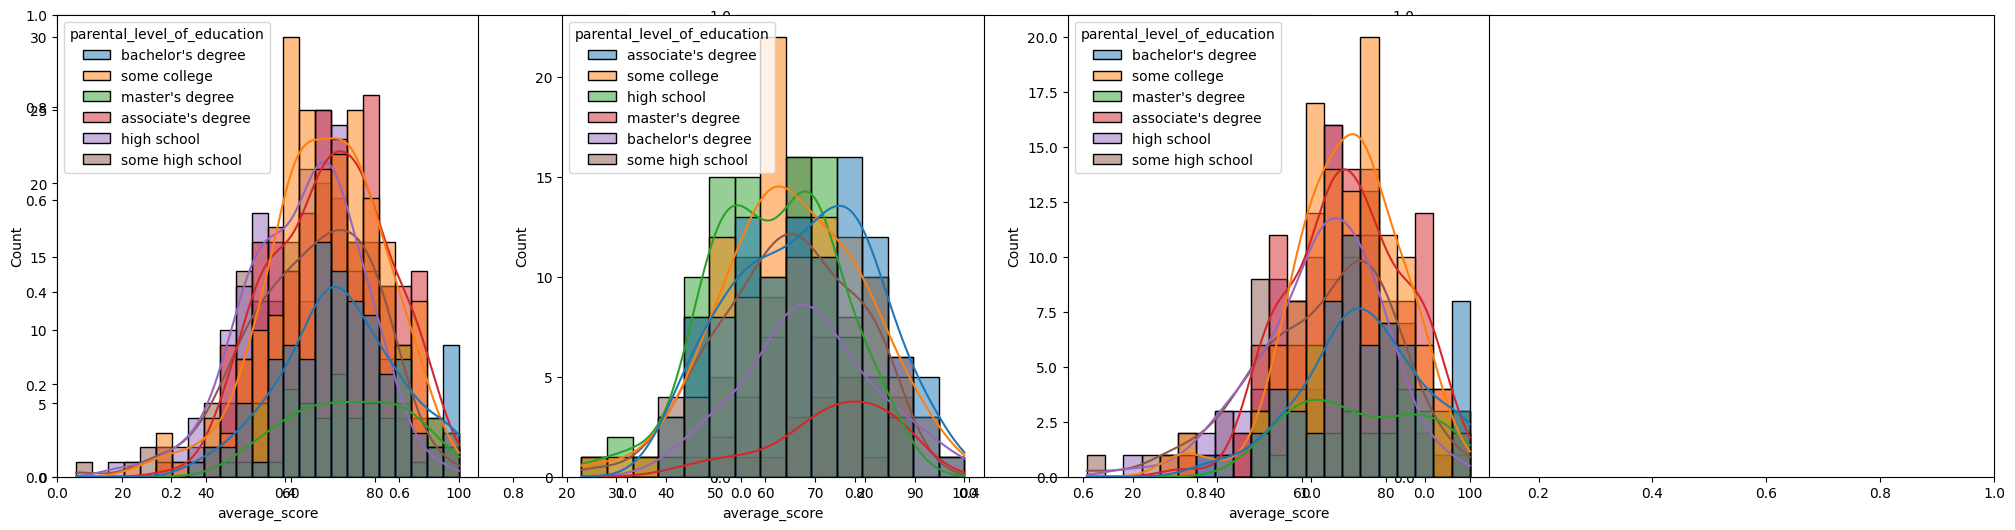

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

#### Insights
- In general parental_level of education does not affect the students 
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

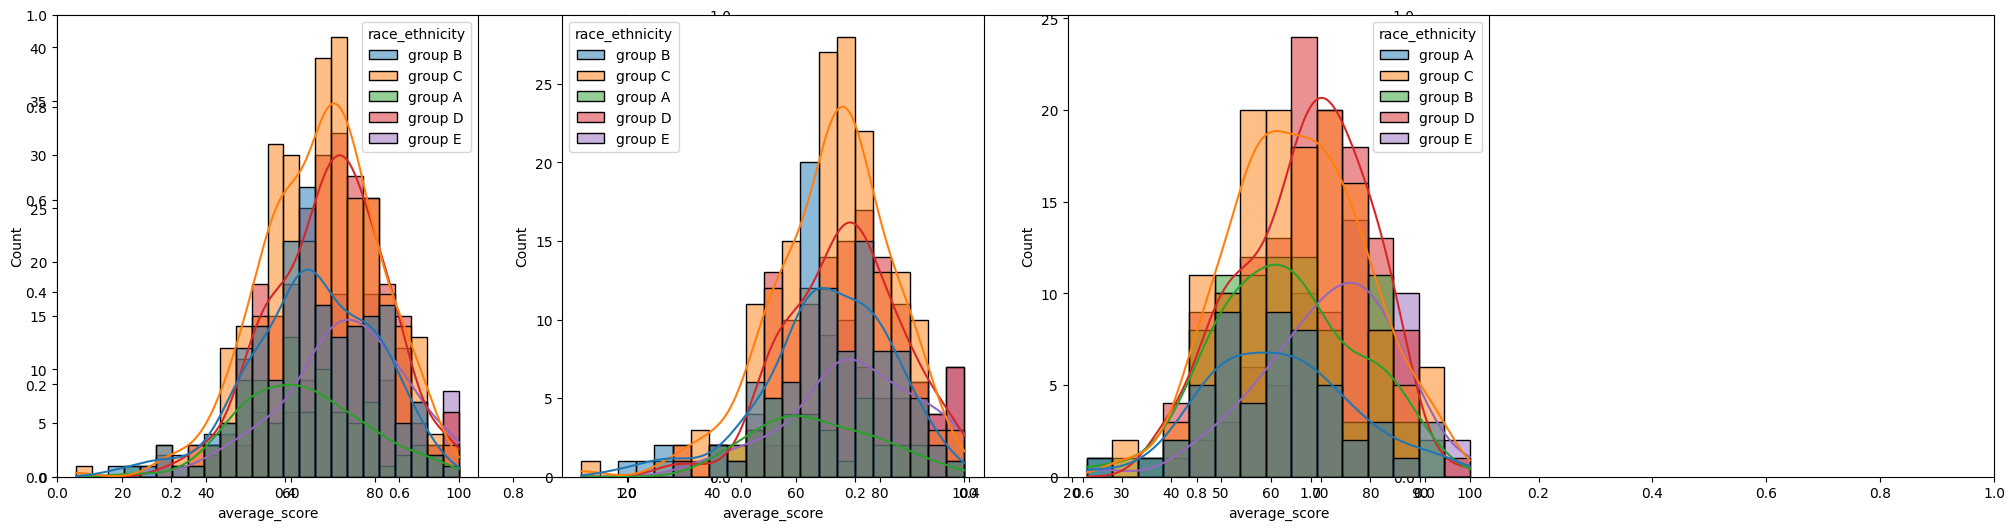

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

#### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### Maximm score of students in all three subjects

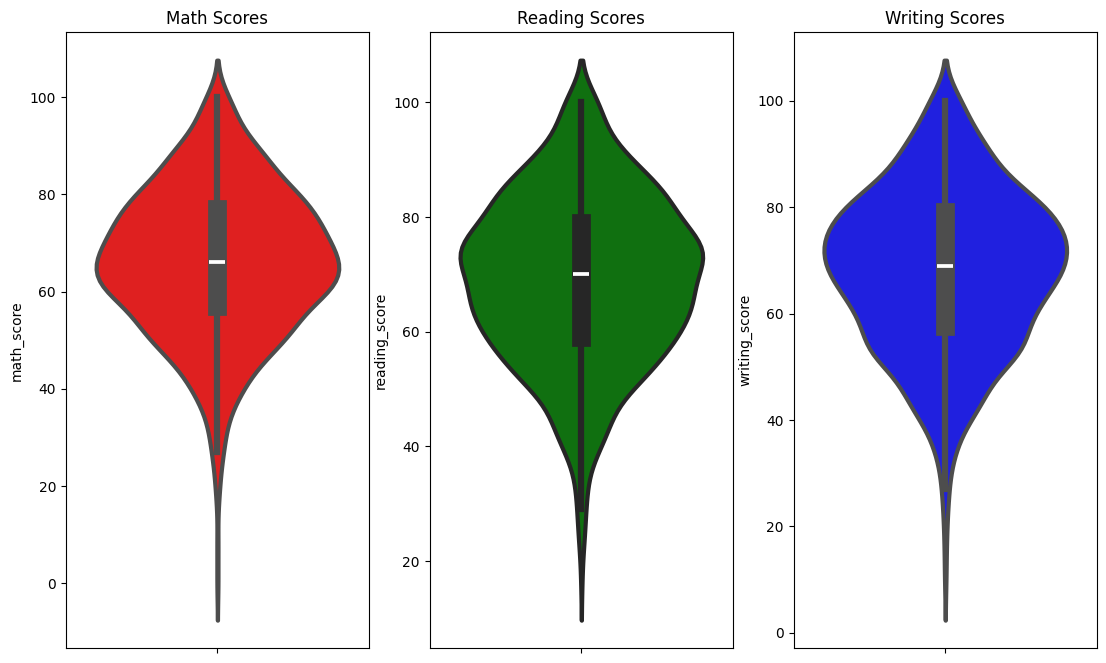

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title("Math Scores")
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title("Reading Scores")
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title("Writing Scores")
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots,it can be observed clearly that most of the students score between 60-80 in Mathematics and scored in a range of 50-80 in reading and writing./

#### 4.3 Multivariate analysis using pieplot

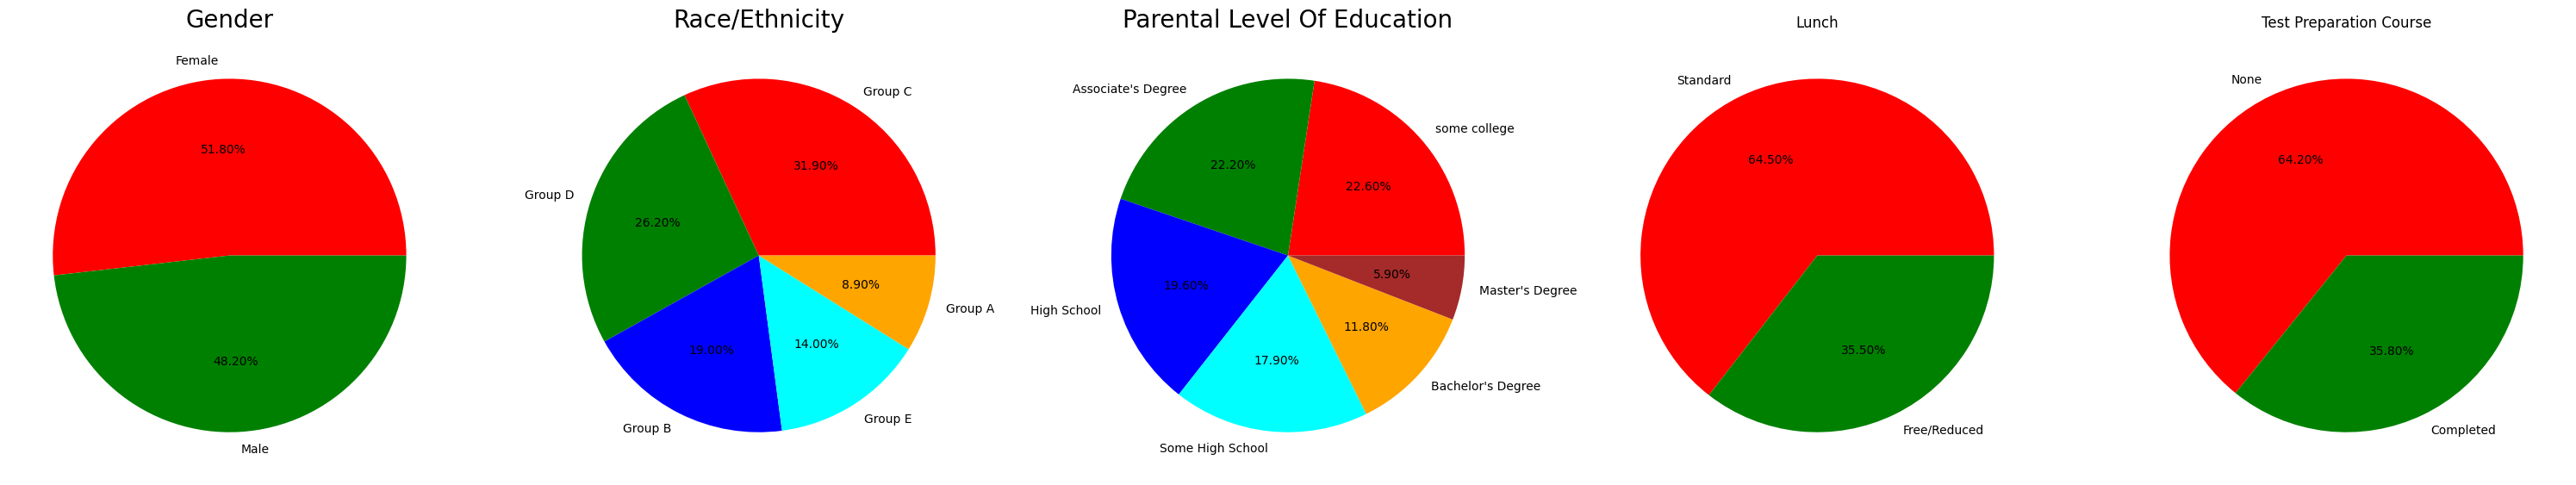

In [27]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct="%.2f%%")
plt.title("Gender",size=20)
plt.axis('off')




plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C','Group D','Group B','Group E','Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size,colors = color,labels=labels,autopct = "%.2f%%" )
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')




plt.subplot(1,5,3)
size = df['parental_level_of_education'].value_counts()
labels = 'some college',"Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red','green','blue','cyan','orange','brown']

plt.pie(size,colors=color,labels=labels,autopct="%.2f%%")
plt.title("Parental Level Of Education",fontsize=20)
plt.axis('off')



plt.subplot(1,5,4)
size = df['lunch'].value_counts()
labels = 'Standard','Free/Reduced'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct="%.2f%%")
plt.title("Lunch")
plt.axis('off')



plt.subplot(1,5,5)
size = df['test_preparation_course'].value_counts()
labels = 'None','Completed'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct="%.2f%%")
plt.title('Test Preparation Course')
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


#### Insights
- Female and Male students are almost equal 
- Number of students are more in Group C
- Number of students who have standard lunch are greater 
- Number of students who have not enrolled in any test course are greater
- Number of students whose parent level of education is "Some Degree" is greater followed closely by "Assosciate Degree"

#### 4.4 Feature wise Visualisation

##### 4.4.1 GENDER column
- How is distribution of gender?
- Is gender has any impact on student's performance?

#### UNIVARIATE ANALYSIS (How is Distribution of Gender)?

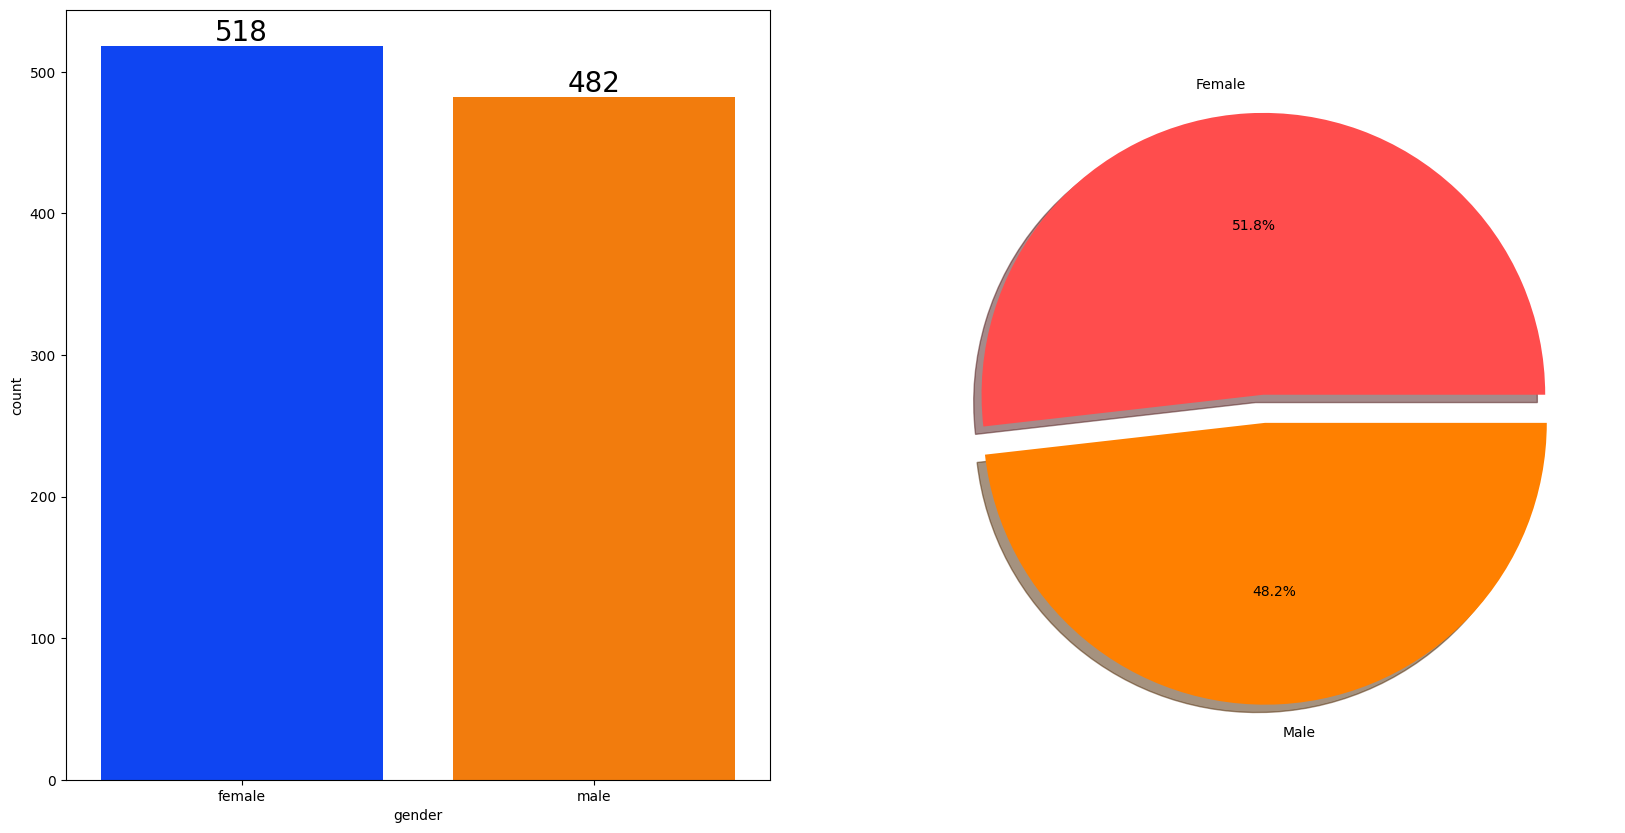

In [28]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright',ax=ax[0] ,saturation=0.9)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct="%1.1f%%",shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

- Gender has balanced data with female students 518 (51.8%) and Male students 482(48.2%)

#### BIVARIATE ANALYSIS (Is gender has any impact on Student's performance) 

In [29]:
numerical_cols= df.select_dtypes(include='number').columns
gender_group = df.groupby('gender')[numerical_cols].mean()
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


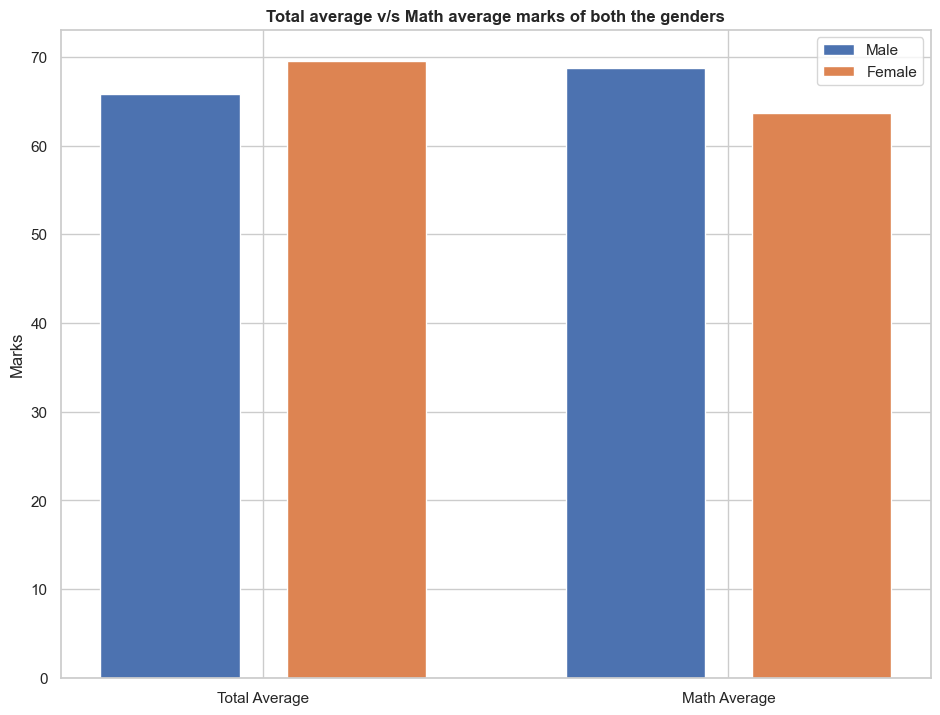

In [40]:
plt.figure(figsize=(10,8))

X = ['Total Average','Math Average']

female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2,male_scores,0.3,label='Male')
plt.bar(X_axis + 0.2,female_scores,0.3,label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

- On an average females have high score than Male students
- Whereas Males have higher scores in mathematics

#### 4.4.2 RACE/ETHNICITY column
- How is Group wise distribution
- Is Race/Ethnicity have impact on student performance

In [42]:
df['race_ethnicity'].value_counts().index

Index(['group C', 'group D', 'group B', 'group E', 'group A'], dtype='object', name='race_ethnicity')

#### UNIVARIATE ANALYSIS (How is groupwise distribution)?

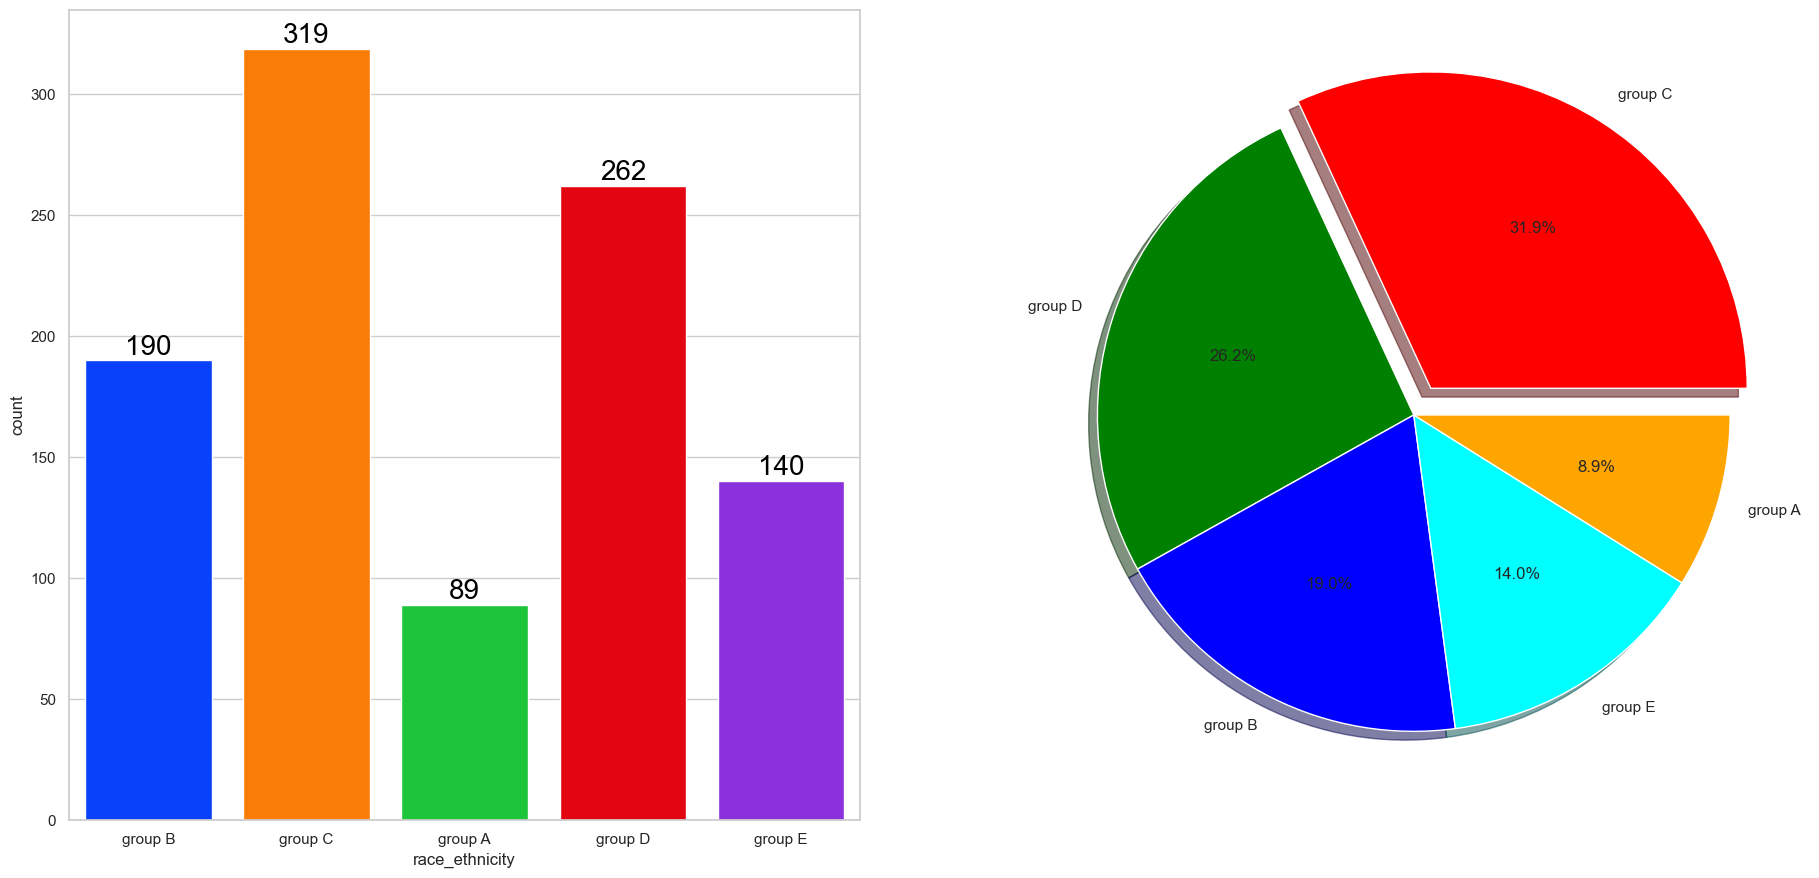

In [44]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df, ax=ax[0],palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,colors=['red','green','blue','cyan','orange'],explode=[0.1,0,0,0,0],autopct="%1.1f%%",shadow=True)
plt.show()

- Most of the students belongs to Group C/group D
- There are very few students of Group A

#### BIVARIATE ANALYSIS (IS Race/Ethnicity have impact on student's performance? )

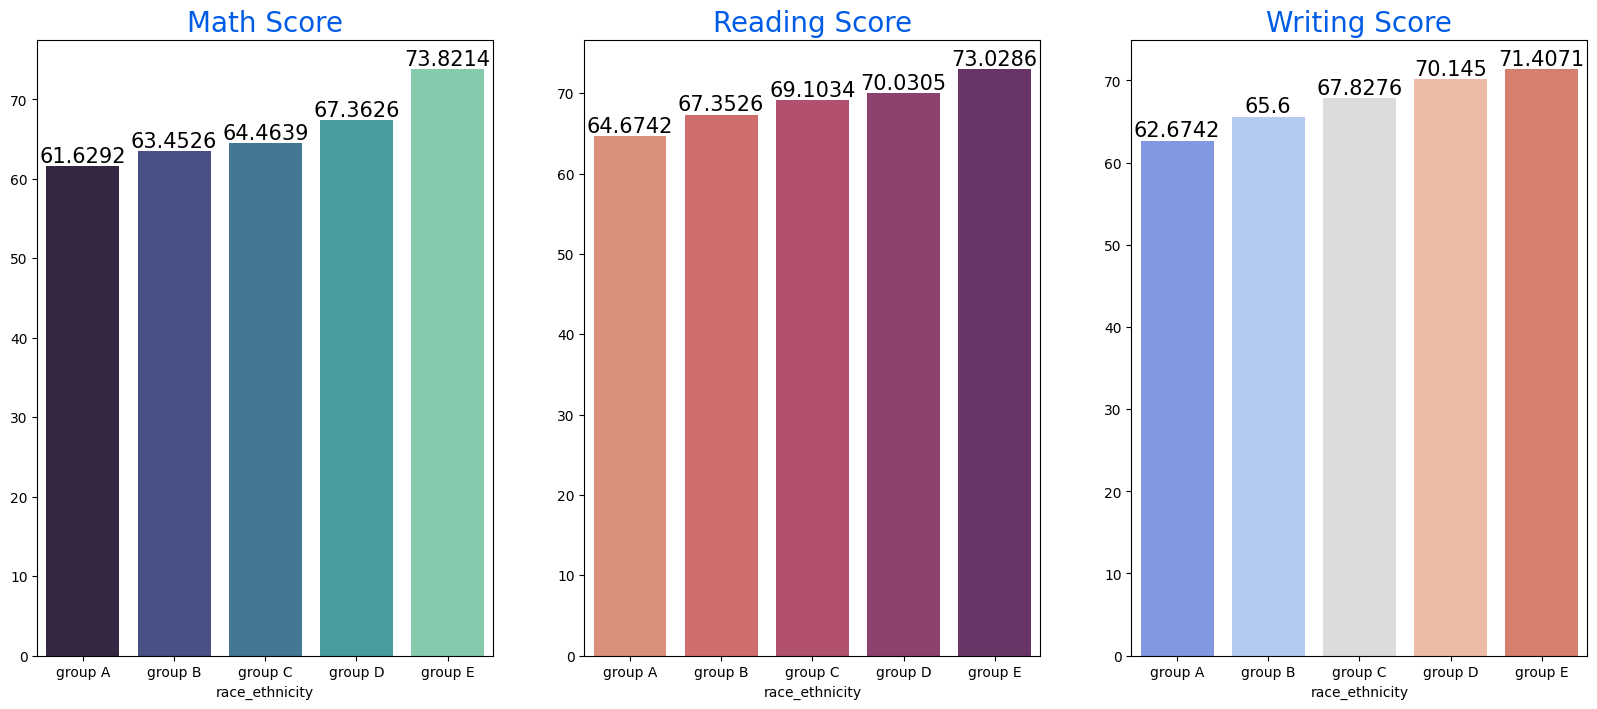

In [32]:
Groupdata2 = df.groupby('race_ethnicity')
fig, ax = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Groupdata2['math_score'].mean().index,y=Groupdata2['math_score'].mean().values,palette='mako',ax = ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

# Reading score vs Race Ethnicity
sns.barplot(x=Groupdata2['reading_score'].mean().index,y=Groupdata2['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading Score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

#Writing score vs Race ethnicity 
sns.barplot(x=Groupdata2['writing_score'].mean().index, y = Groupdata2['writing_score'].mean().values,palette='coolwarm',ax= ax[2])
ax[2].set_title('Writing Score',color='#005ce6',size =20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

In [47]:
x=Groupdata2['math_score'].mean()
print(x)

race_ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math_score, dtype: float64


- Group E students have scored the highest marks
- Group A students scored the lowest marks 
- Students from a lower economic status have a lower average in all course subjects]

####

#### 4.4.3 PARENTAL LEVEL OF EDUCATION column
- What is educational background of students parent?
- Is parent education have impact on the student performance?


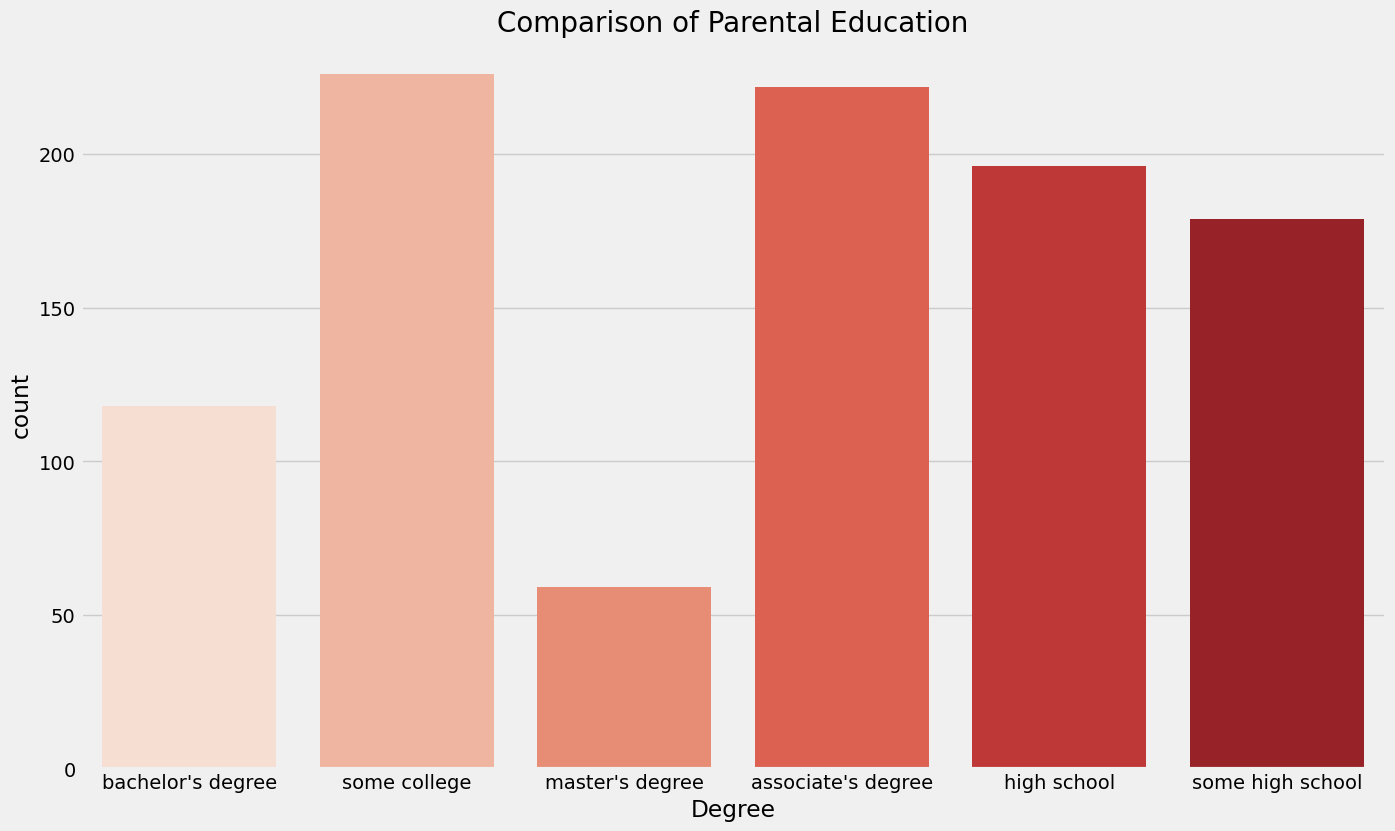

In [34]:
plt.rcParams['figure.figsize']= ( 15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'],data=df, palette='Reds')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

- Largest number of parents are from some college

###

#### BIVARIATE ANALYSIS(Is parental education has any impact on student's performance)?

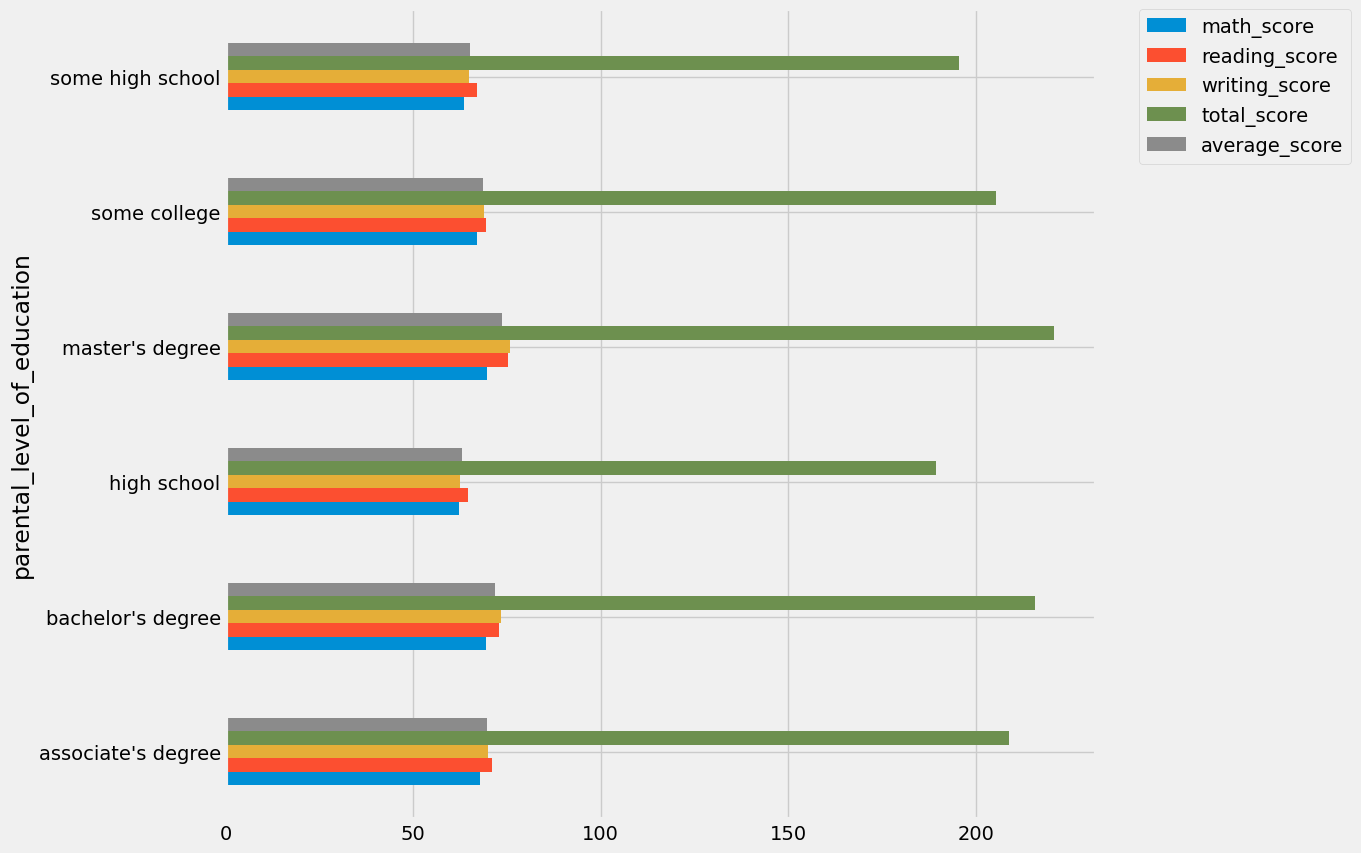

In [35]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor = (1.05,1), loc =2,borderaxespad = 0.)
plt.show()

- The students whose parents possess master and bachelor degree level of education have the highest score than others

#### 4.4.4 LUNCH column
- Which type of lunch is most common among students?
- what is the effect of lunch type on student results?


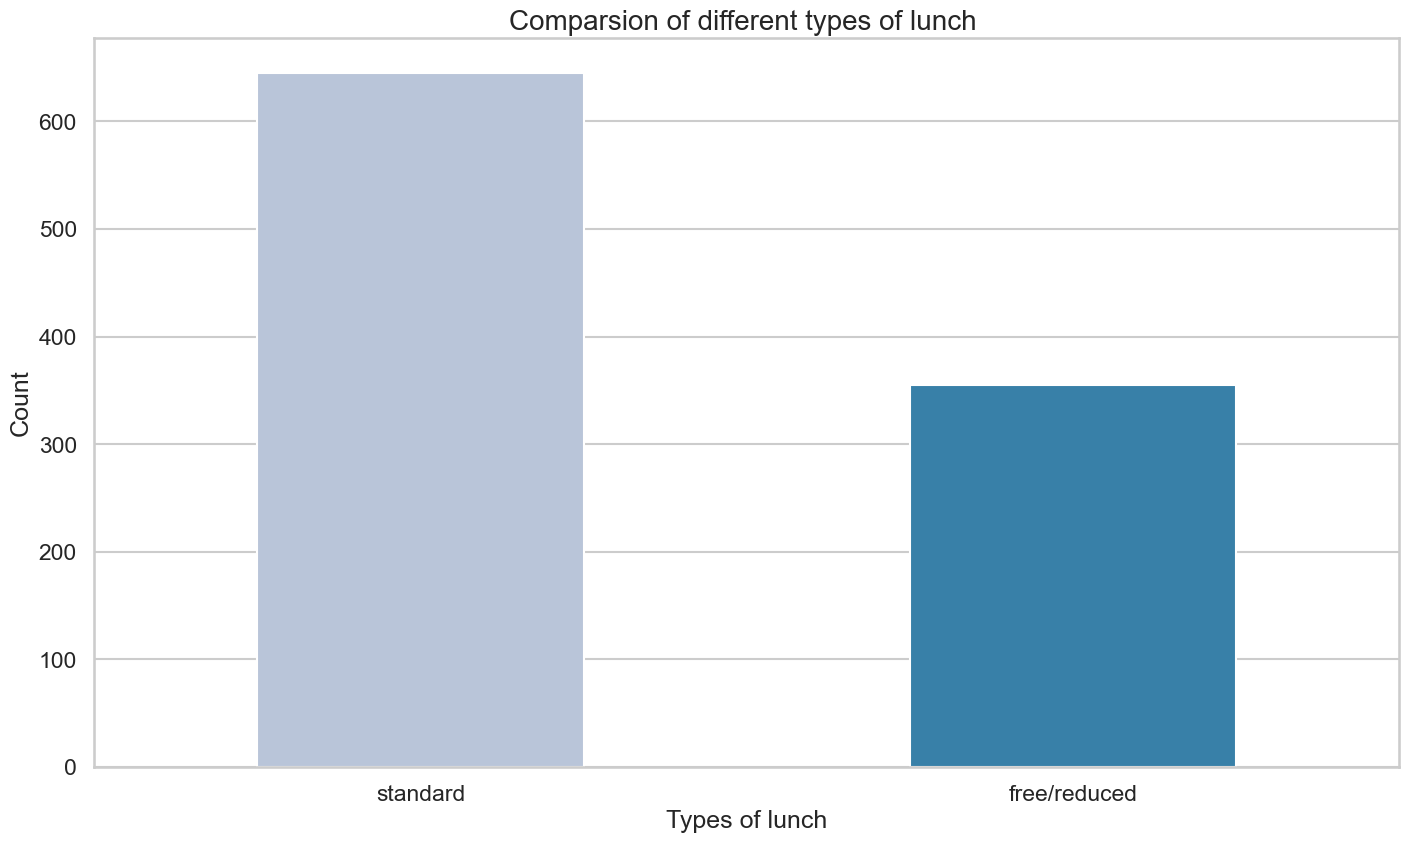

In [52]:
plt.rcParams['figure.figsize'] = (15,9)
sns.countplot(x=df['lunch'], palette = 'PuBu',width=0.5)
plt.title("Comparsion of different types of lunch ",size=20,fontweight = 30)
plt.xlabel('Types of lunch')
plt.ylabel('Count')
plt.show()

- Students being served Standard lunch  more than free lunch

#### BIVARIATE ANALYSIS(Is lunch type intake has any impact on the student's performance)?

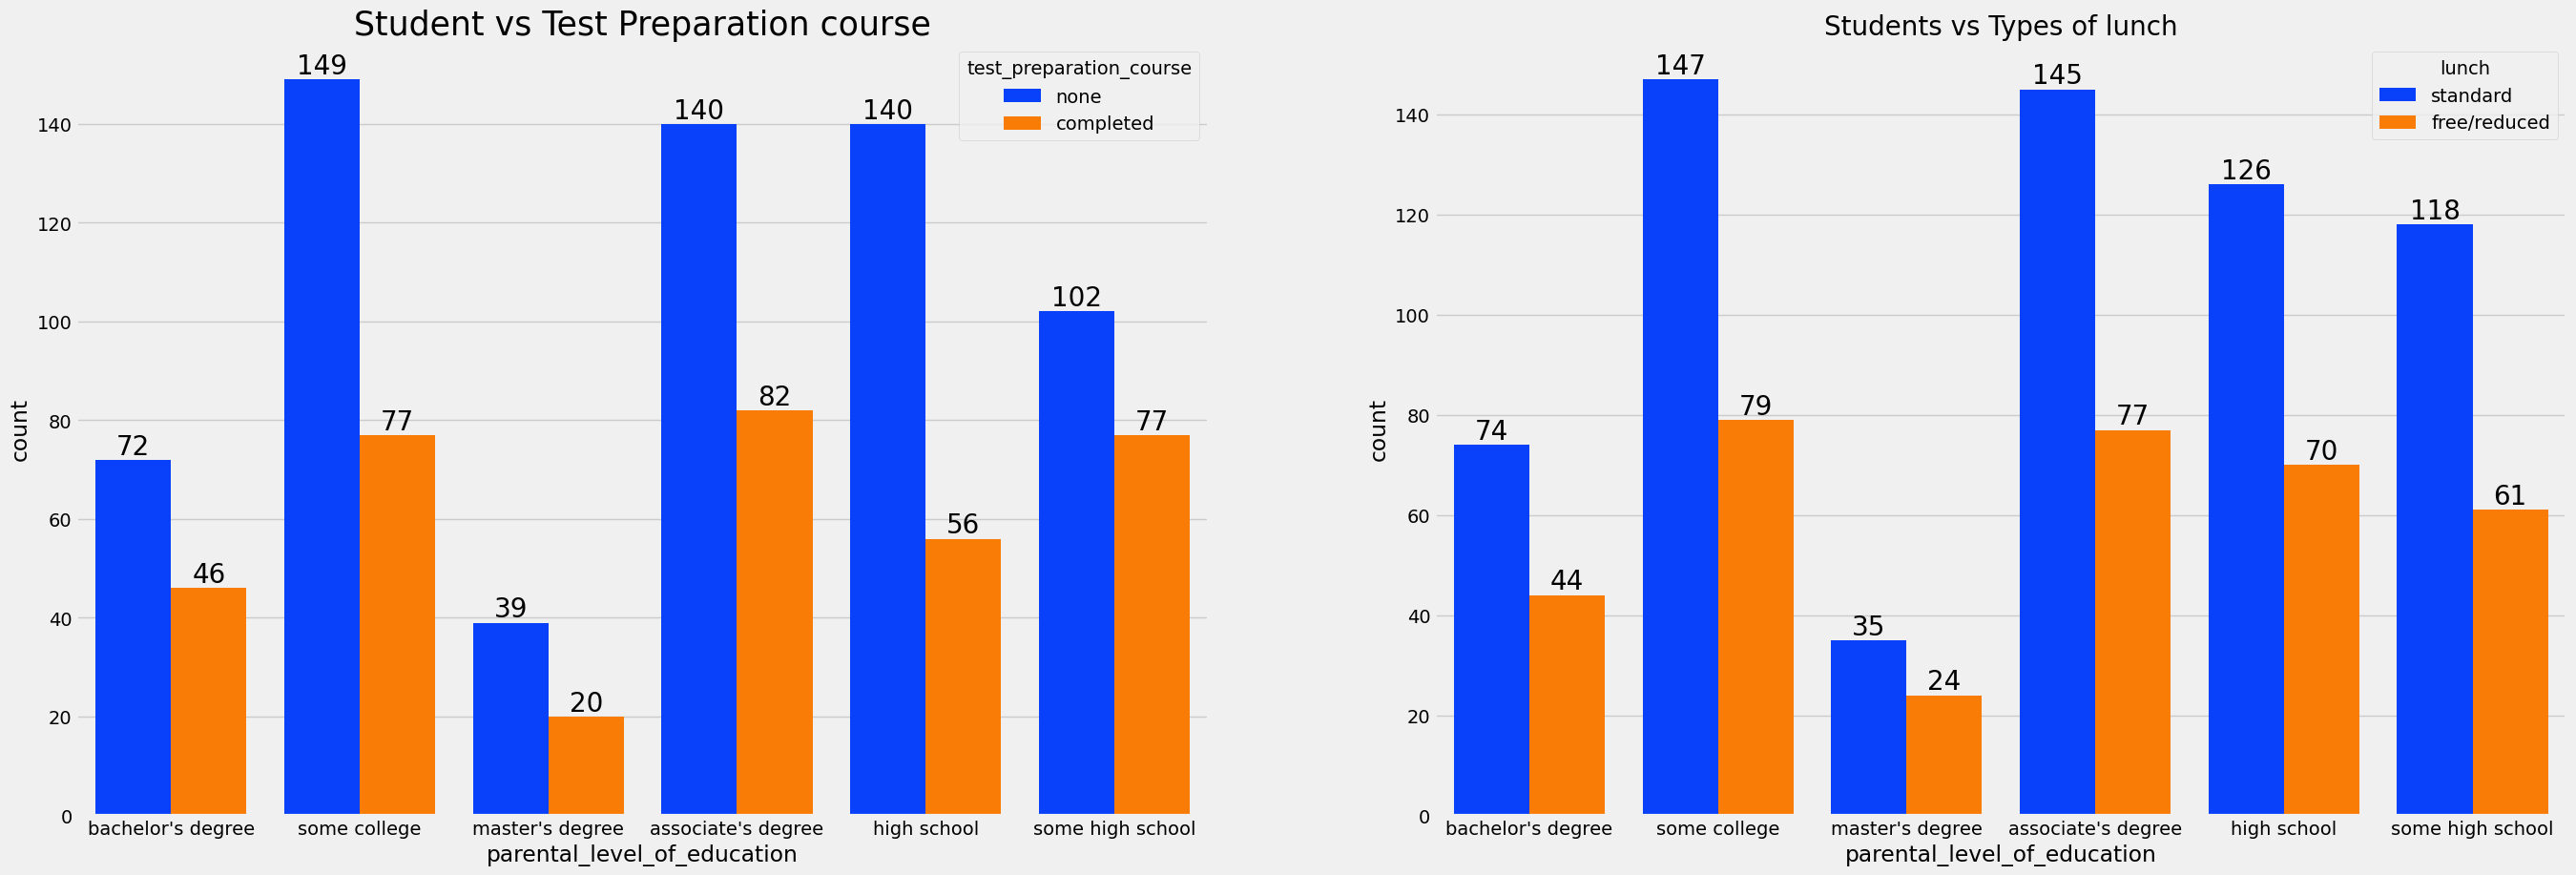

In [37]:
fig , ax = plt.subplots(1,2,figsize=(30,10))
sns.countplot(x= df['parental_level_of_education'], data= df,palette= 'bright',ax= ax[0],hue='test_preparation_course',saturation= 0.95)
ax[0].set_title("Student vs Test Preparation course",color = 'black',size = 25)
for container in ax[0].containers:
    ax[0].bar_label(container,color =  'black',size = 20)


sns.countplot(x= df['parental_level_of_education'], data = df, palette= 'bright', ax = ax[1], hue ='lunch', saturation= 0.95)
ax[1].set_title("Students vs Types of lunch",color = 'black',size = 20)
for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black',size = 20)


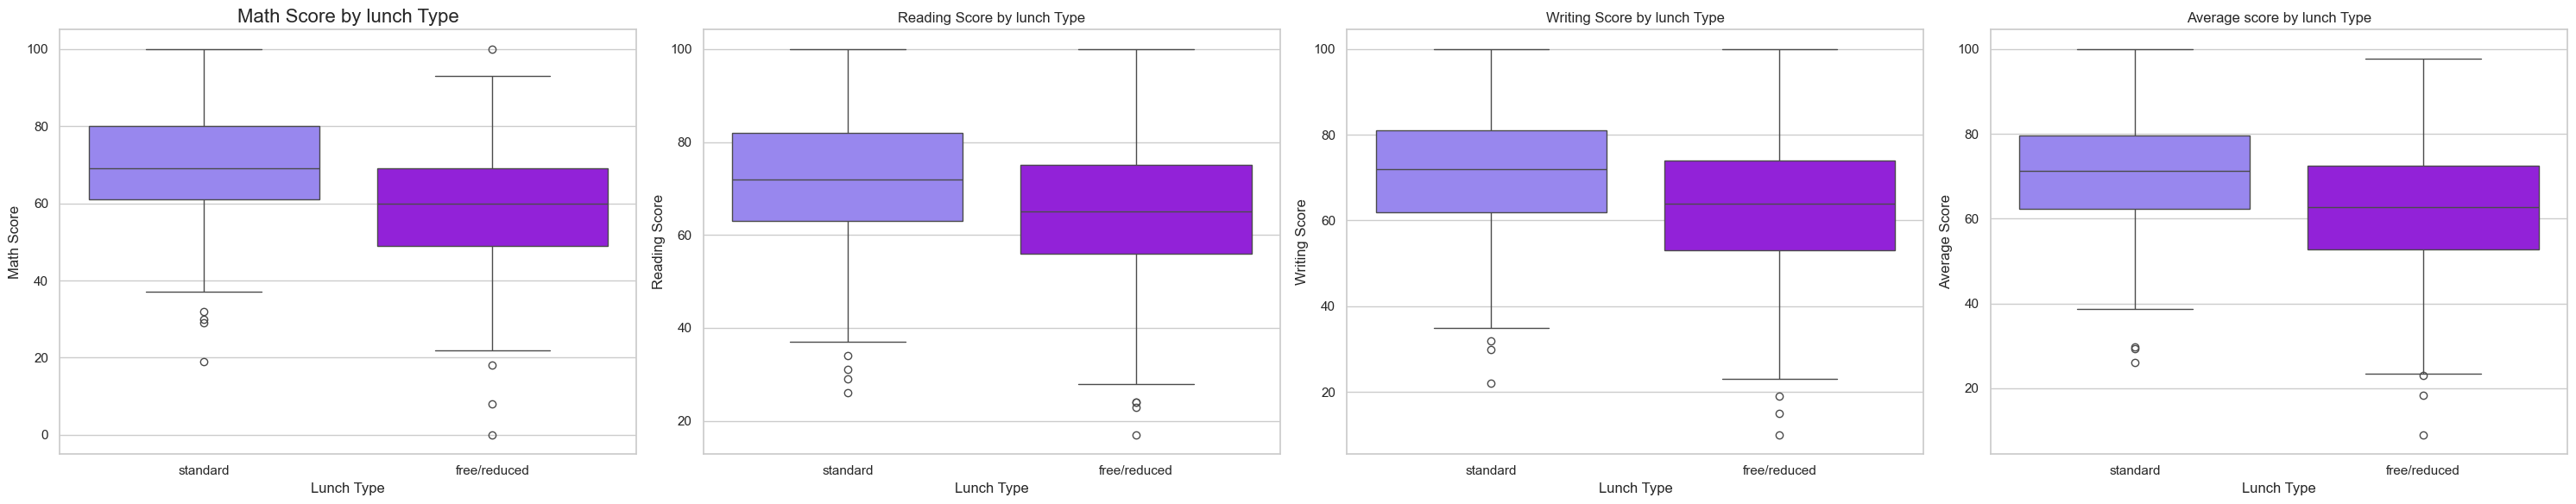

In [38]:
sns.set_theme(style='whitegrid')

fig, ax =plt.subplots(1,4,figsize = (30,6))

sns.boxplot(data = df ,x =df['lunch'],y=df['math_score'],palette= ['#8d76ff','#9904f6'],ax = ax[0])
ax[0].set_title("Math Score by lunch Type",fontsize = 16)
ax[0].set_ylabel("Math Score")
ax[0].set_xlabel("Lunch Type")

sns.boxplot(data = df , x = df['lunch'], y = df['reading_score'],palette = ['#8d76ff','#9904f6'], ax =ax[1])
ax[1].set_title("Reading Score by lunch Type")
ax[1].set_ylabel("Reading Score")
ax[1].set_xlabel("Lunch Type")

sns.boxplot(data = df, x =df['lunch'], y = df['writing_score'],palette=['#8d76ff','#9904f6'],ax= ax[2])
ax[2].set_title("Writing Score by lunch Type")
ax[2].set_ylabel('Writing Score')
ax[2].set_xlabel("Lunch Type")

sns.boxplot(data= df , x= df['lunch'],y= df['average_score'],palette= ["#8d76ff","#9904f6"],ax = ax[3])
ax[3].set_title("Average score by lunch Type")
ax[3].set_ylabel("Average Score")
ax[3].set_xlabel("Lunch Type")

plt.tight_layout()
plt.show()

- Students who get Standard lunch tend to perform better than students who get free/reduced lunch  

#### 4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common among students?
- Is test preparation course has any impact on student's performance?

<Axes: xlabel='lunch', ylabel='writing_score'>

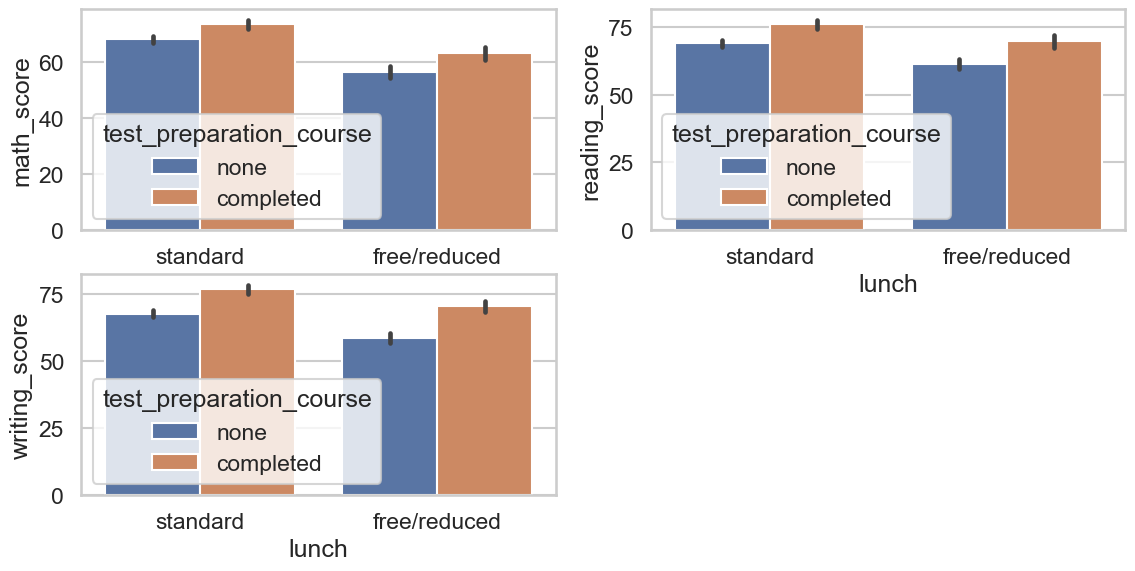

In [63]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y = df['math_score'], hue = df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y= df['reading_score'],hue = df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y = df['writing_score'],hue = df['test_preparation_course'])

- Students who have prepared for the test preparation course have higher scores in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

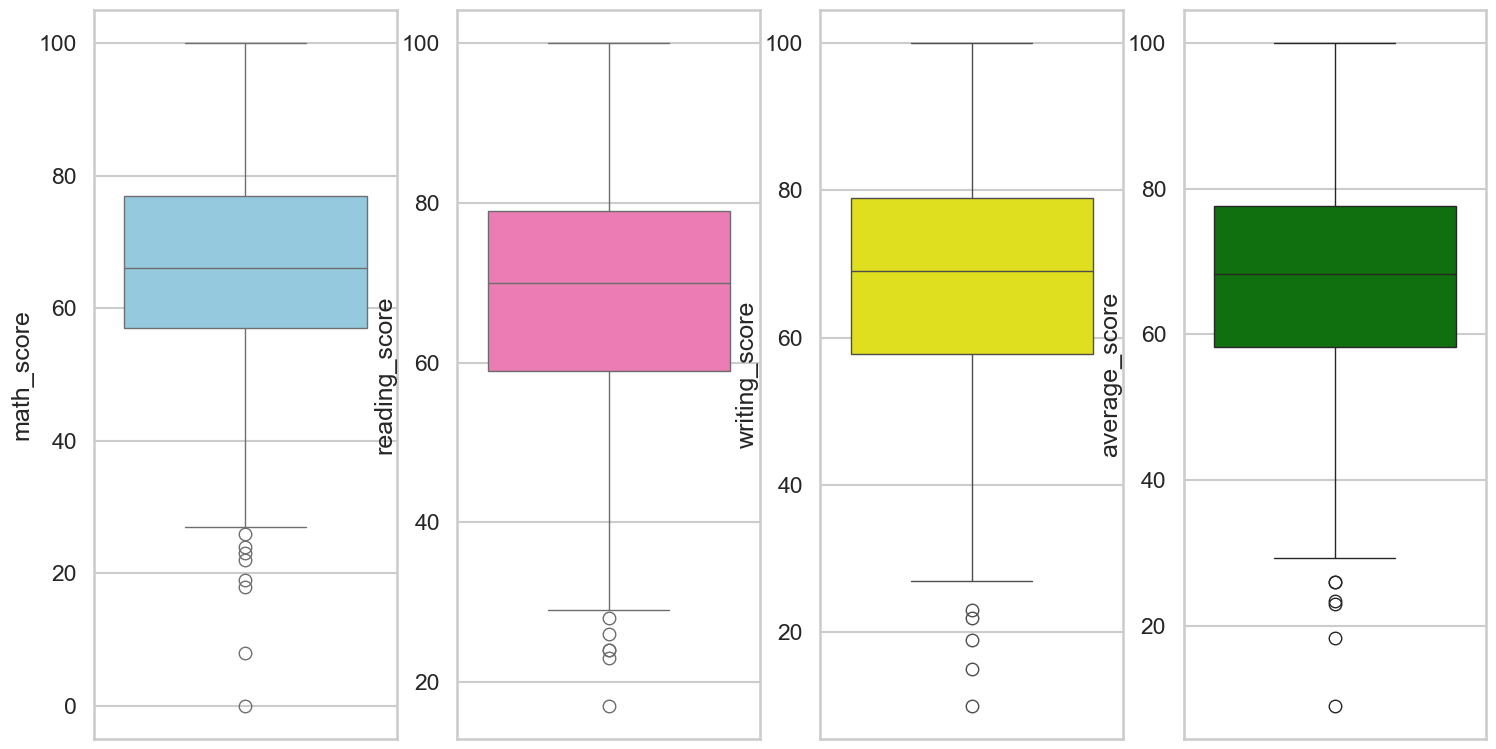

In [65]:
plt.subplots(1,4,figsize=(16,9))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='green')
plt.show()

#### 4.4.7 MULTIVARIATE ANALYSIS USING PAIRPLOT

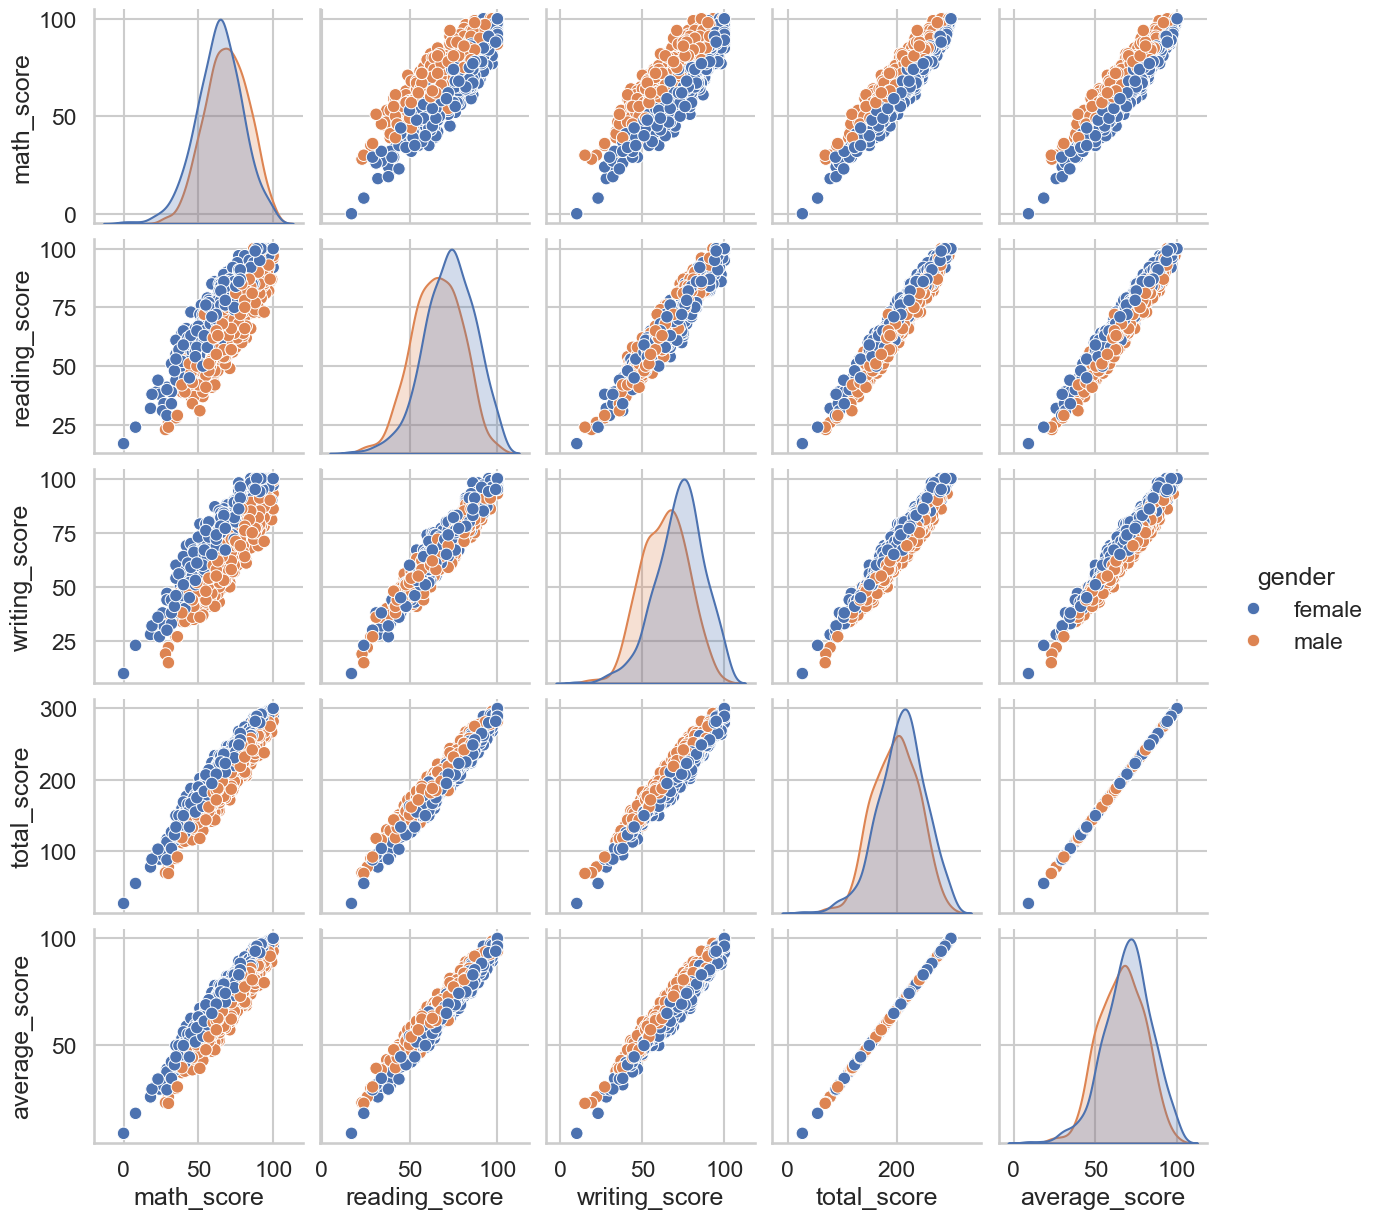

In [66]:
sns.pairplot(df,hue='gender')
plt.show()

- From the above plot it is clear that all the scores increase linearly with each other

#### 5.CONCLUSIONs
- Student's performance is not much related with the test preparation course.
- Student's performance is related with lunch,parental level of education and race.
- Female students lead in pass percentage and also are top scorers.
- Finishing preparation course is beneficial.
